# Formulate the problem

 In this project, I want to build a supervised model that detect the fake news.

## Data 

The data can be found [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)

Two dataset fake and real news . Each one has four columns title , text, subject and date.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# import nltk
# nltk.download('stopwords')

## Loading data

In [3]:
fake_news = pd.read_csv('Fake.csv')
real_news = pd.read_csv('True.csv')

In [4]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_news.shape

(23481, 4)

In [6]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real_news.shape

(21417, 4)

## Preprocessing & Feature Engineering 

First I want to add a column to each dataset that indicate the label then I will combine them into one dataframe this step consider as feature engineering step 

In [8]:
real_news['is_fake'] = 0
real_news.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [9]:
fake_news['is_fake'] = 1
fake_news.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
#combine
df_news = pd.concat([fake_news, real_news], ignore_index=True)
df_news.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


###### Handling missing values 

In [11]:
df_news.replace("?", np.nan, inplace = True)

In [12]:
df_news.isnull().sum().sum()

0

###### Let's check if there're duplicates

In [13]:
df_news.shape

(44898, 5)

In [14]:
df_news= df_news.drop_duplicates()
df_news.shape

(44689, 5)

######  I want to extarct the year and month from date column to help me to get more insghts in the exploration and visulaztion steps

In [15]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   is_fake  44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


I will convert date from object type to datetime object  

In [16]:
df_news['date'] = pd.to_datetime(df_news['date'],errors='coerce')

In [17]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   is_fake  44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ MB


In [18]:
#convert from float to int
df_news['year'] = df_news['date'].dt.year.astype('Int64')
df_news['month'] = df_news['date'].dt.month.astype('Int64')
df_news.head()

,title,text,subject,date,is_fake,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017,12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017,12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017,12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017,12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017,12


In [19]:
df_news.drop(["date"], axis=1, inplace=True)

###### I want to add column that count the words in each text to help to get more insghts in the exploration and visulaztion steps

In [20]:
df_news['words_count']= df_news['text'].apply(len)

In [21]:
df_news.head()

,title,text,subject,is_fake,year,month,words_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,1,2017,12,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,1,2017,12,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,1,2017,12,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,1,2017,12,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,1,2017,12,2346


Let's check the null values again 

In [22]:
df_news.isnull().sum()

title           0
text            0
subject         0
is_fake         0
year           10
month          10
words_count     0
dtype: int64

I will remove this rows since they're only 10

In [23]:
df_news.dropna(subset=["month","year"], axis=0, inplace=True)

In [24]:
df_news.isnull().sum()

title          0
text           0
subject        0
is_fake        0
year           0
month          0
words_count    0
dtype: int64

###### Next I want to start processing the text column. I will:
- remove stop words (is , the , he, etc ....) 
- remove punctuations
- convert the text to be lowercase 

In [25]:
#stopwords
stop = stopwords.words('english')

In [26]:
df_news['text'] = df_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [27]:
#remove punctuations
df_news['text'] = df_news['text'].str.replace('[^\w\s]','')

In [28]:
#convert to lowercase 
df_news['text'] = df_news['text'].str.lower()

In [29]:
df_news.head()

,title,text,subject,is_fake,year,month,words_count
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,1,2017,12,2893
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,1,2017,12,1898
2,Sheriff David Clarke Becomes An Internet Joke...,on friday revealed former milwaukee sheriff da...,News,1,2017,12,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced would ...,News,1,2017,12,2774
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,1,2017,12,2346


In [30]:
# df_news.to_csv('cleaned_df.csv')

## EDA and Data Visulization 

#### Q) How many fake news do we have?

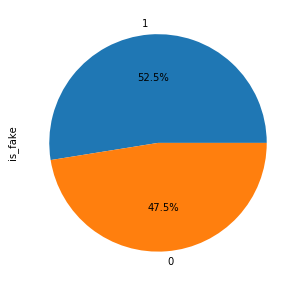

In [31]:
df_news.is_fake.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

This is good , we don't have a problem with imbalance data

#### Q) What'is the distribution of words in each label?

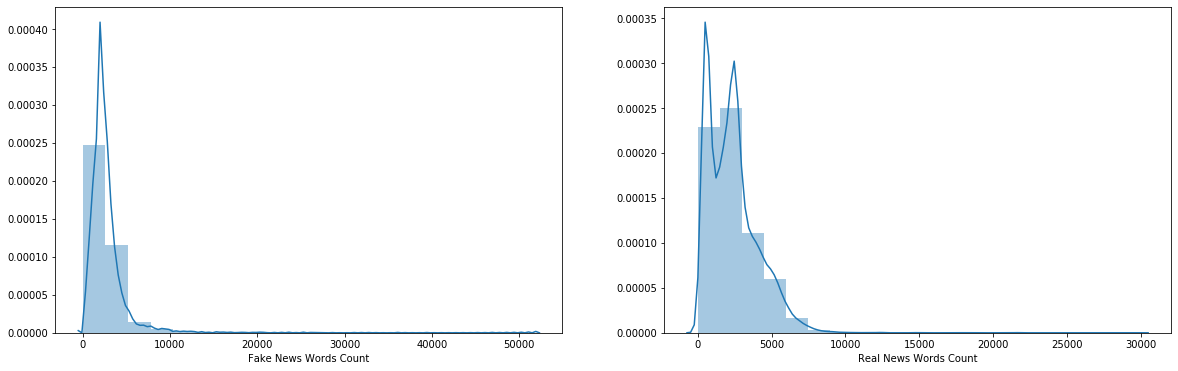

In [32]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(df_news[df_news['is_fake']==1].words_count.values, bins = 20, ax = ax[0])
ax[0].set_xlabel("Fake News Words Count")

sns.distplot(df_news[df_news['is_fake']==0].words_count.values, bins = 20, ax = ax[1])
ax[1].set_xlabel("Real News Words Count")

plt.show()


It seems that fake news contain more words 

#### Q) Which month has more fake news?

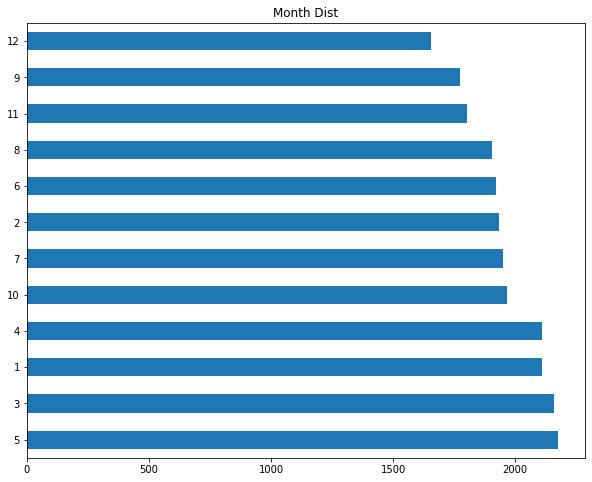

In [33]:
plt.figure(figsize=(10,8))
df_news[df_news['is_fake']==1].month.value_counts().plot(kind='barh')
plt.title('Month Dist')
plt.show()

It shows that March and May have more fake news 

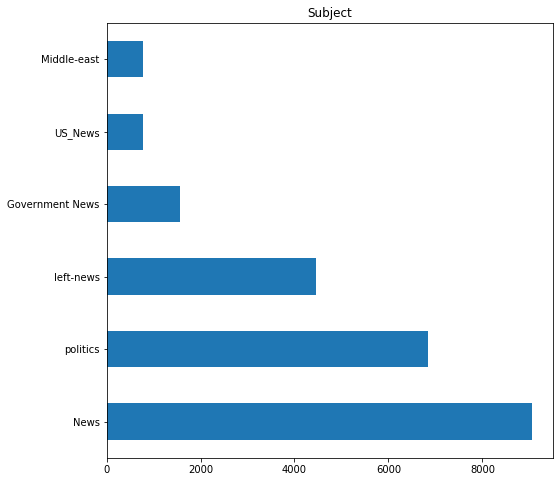

In [34]:
plt.figure(figsize=(8,8))
df_news[df_news['is_fake']==1].subject.value_counts().plot(kind='barh')
plt.title('Subject')
plt.show()

###### Q) What are the most common words in the fake and real news.
I assume that most of the words in the fake news aren't found or used in the real one.

Fake Word clouds

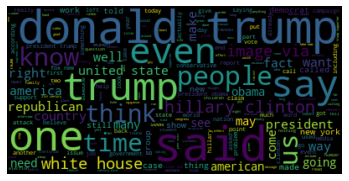

In [35]:
fake_txt = " ".join(fake for fake in df_news[df_news['is_fake']==1].text)
wordcloud = WordCloud().generate(fake_txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Real Word Clouds

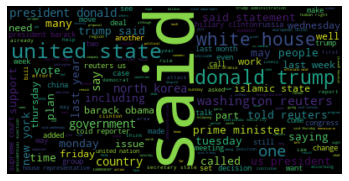

In [36]:
real_txt = " ".join(fake for fake in df_news[df_news['is_fake']==0].text)
wordcloud = WordCloud().generate(real_txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see many frequent words found in both fake and real news, I think this will be challenging in the prediction phase

## Building Model 

###### Splitting Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_news["text"], df_news["is_fake"], test_size=0.3, random_state=111)

Now , I want to build a model that predict if the news are fake or not.
in this step I will only use text and label column. 
then I have to convert the text into numbers so the model can understand it and use it for prediction, for this I will use TfidfVectorizer

###### TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer("english")
train_vect = vectorizer.fit_transform(X_train)
test_vect = vectorizer.transform(X_test)

In [39]:
# pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

###### Building classification model

In [40]:
modelNb = MultinomialNB()
modelNb.fit(train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

###### Save model for future use 

In [41]:
# filename='model.pkl'
# pickle.dump(modelNb, open(filename, 'wb'))

In [42]:
# Load the saved model
# model = pickle.load(open('model.pkl', 'rb'))

In [43]:
y_train_pred = modelNb.predict(train_vect)
y_test_pred = modelNb.predict(test_vect)

In [44]:
# def train_test(clf):
#     """
#        Return train and test F1 score with the model name
       
#        inputs:
#        --------
#        clf : the learner
       
#     """
#     train_prediction =  (clf.fit(X_train, y_train)).predict(X_train)
#     test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
#     train_f1 =  accuracy_score(y_train, train_prediction)*100
#     test_f1= accuracy_score(y_test, test_predictions)*100
#     name = clf.__class__.__name__
    
#     return train_f1, test_f1, name

In [45]:
# clf_A = RandomForestClassifier(random_state=10)
# a_train_accuracy , a_test_faccuracy, a_model= train_test(clf_A)

# clf_B = MultinomialNB()
# b_train_accuracy , b_test_accuracy , b_model= train_test(clf_B)

# clf_C = KNeighborsClassifier(n_neighbors = 5)
# c_train_accuracy , c_test_accuracy , c_model = train_test(clf_C)

# clf_D = DecisionTreeClassifier(random_state=10)
# d_train_accuracy , d_test_accuracy , d_model = train_test(clf_D)


# clf_F = SVC(kernel='sigmoid', gamma=1.0)
# f_train_accuracy , f_test_accuracy , f_model = train_test(clf_D)

In [46]:
# models = {'classifier': [ a_model , b_model , c_model,d_model, f_model], 
#           'train accuracy ':[a_train_accuracy , b_train_accuracy, c_train_accuracy,d_train_accuracy, f_train_accuracy], 
#           'test accuracy ': [a_test_faccuracy , b_test_accuracy, c_test_accuracy,d_test_accuracy,f_test_accuracy] }
          
# classifiers = pd.DataFrame(models)


###### Accuracy

In [47]:
print("The accuracy score for training set")
print(accuracy_score(y_train,y_train_pred))
print("---------------------------------------")
print("The accuracy score for testing set")
print(accuracy_score(y_test,y_test_pred))

The accuracy score for training set
0.956642685851319
---------------------------------------
The accuracy score for testing set
0.9524022679797075


###### lets see the other performance measurements

In [48]:
print("The evaluation matrix for training set")
print(classification_report(y_train,y_train_pred))
print("---------------------------------------")
print("The evaluation matrix of model for testing set")
print(classification_report(y_test,y_test_pred))

The evaluation matrix for training set
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14919
           1       0.97      0.95      0.96     16356

    accuracy                           0.96     31275
   macro avg       0.96      0.96      0.96     31275
weighted avg       0.96      0.96      0.96     31275

---------------------------------------
The evaluation matrix of model for testing set
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6292
           1       0.97      0.94      0.95      7112

    accuracy                           0.95     13404
   macro avg       0.95      0.95      0.95     13404
weighted avg       0.95      0.95      0.95     13404



In [49]:
compare={"Actual": y_test, "Predict": y_test_pred}
pd.DataFrame(compare)

,Actual,Predict
32021,0,0
13363,1,1
37903,0,0
29964,0,0
956,1,1
...,...,...
17086,1,0
6926,1,1
36925,0,0
25936,0,0


## Conclusion

I got 95% in all of the scores in both training and testing, and we don't have any underfitting and no need to improve any score in our case.